In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Define functions

# Scale values
def scale(arr):
    return (np.array(arr) - np.mean(arr)) / np.std(arr)

# Find the slope of the best fitting line
def fit_slope(x, y):
    return (np.mean(x) * np.mean(y) - np.mean(x * y)) / (np.mean(x)**2 - np.mean(x**2))

# Rotate point counterclockwise
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

# Calculate variation
def variation(array, mean=0):
    return np.sum((mean - array) ** 2) / (array.shape[0]-1)

# Find the coordination of the intersection between 2 lines
def lines_intersection(coefficients1, coefficients2):
    coefficients1, coefficients2 = np.copy(coefficients1), np.copy(coefficients2)
    if coefficients1.shape[0] < coefficients2.shape[0]:
        coefficients1 = np.pad(coefficients1, (0,coefficients2.shape[0]-coefficients1.shape[0]), 
                           'constant', constant_values=0)
        bias1 = 0
        bias2 = coefficients2[-1]
    elif coefficients1.shape[0] > coefficients2.shape[0]:
        coefficients2 = np.pad(coefficients2, (0, coefficients1.shape[0]-coefficients2.shape[0]), 
                           'constant', constant_values=0)
        bias2 = 0
        bias1 = coefficients1[-1]
    else:
        bias1 = coefficients1[-1]
        bias2 = coefficients2[-1]
    bias_sum = bias2 - bias1
    coefficients1 = coefficients1[:-1]
    coefficients2 = coefficients2[:-1]
    total = 0
    for i in range(coefficients1.shape[0]):
        total += coefficients1[i] + (-1 * coefficients2[i])
        
    # No intersection
    if total == 0:
        return None
    x = (1/total) * bias_sum
    y = [x * coefficients1 + bias1][0][0]
    return [x,y]
    
# Find a prependicular line (can be moved from some point (origin))
def find_prependicular_line(coefficients, origin=None):
    coefficients = np.copy(coefficients)
    bias = coefficients[-1]
    slopes = coefficients[:-1]
    slopes = -1 * np.reciprocal(slopes, dtype='float')
    coefficients[:-1] = slopes
    if origin is None:
        origin = np.zeros(coefficients.shape[0]-1)
    bias += np.sum(slopes * -1 * origin[:-1]) + origin[-1]
    coefficients[-1] = bias
    return coefficients

def project_points_onto_line(x, y, coefficients):
    if x.shape[0] != y.shape[0]:
        return None
    projections_x = np.zeros(x.shape[0])
    projections_y = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        # pr is prependicular line
        pr_slope, pr_b = find_prependicular_line(coefficients, np.array([x[i], y[i]]))
        inter_x, inter_y = lines_intersection(coefficients, np.array([pr_slope, pr_b]))
        projections_x[i] = inter_x
        projections_y[i] = inter_y
    return projections_x, projections_y

Text(0.5, 1.0, 'Original data')

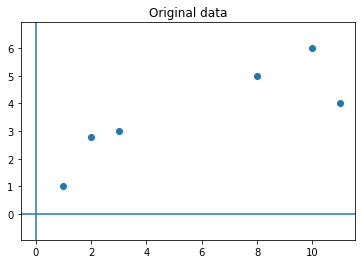

In [3]:
# original data
x1 = np.array([10, 11, 8, 3, 2, 1], dtype='float')
x2 = np.array([6, 4, 5, 3, 2.8, 1], dtype='float')

# Visualize
plt.scatter(x1,x2)
plt.axis('equal')
plt.axvline(0)
plt.axhline(0)
plt.title("Original data")

Text(0.5, 1.0, 'Original data shifted to 0 as the new origin')

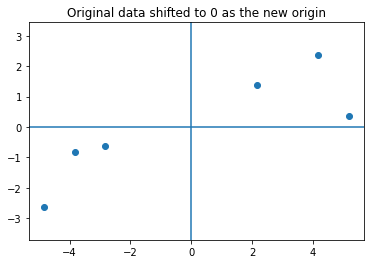

In [4]:
# Shifting data to center
x1_avg_pt = np.average(x1)
x2_avg_pt = np.average(x2)
x1 -= x1_avg_pt
x2 -= x2_avg_pt

# Visualize shifted data
plt.scatter(x1, x2)
plt.axis('equal')
plt.axvline(0)
plt.axhline(0)
plt.title("Original data shifted to 0 as the new origin")

Text(0.5, 1.0, 'PC1')

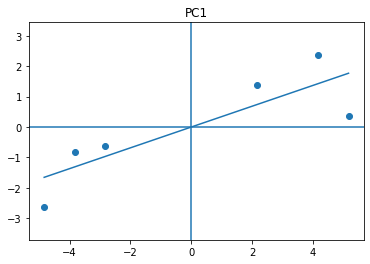

In [5]:
# Finding best fitting line which intersects with the origin
pc1_x = np.arange(np.min(x1), np.max(x1)+1)
pc1_slope = fit_slope(x1,x2)
pc1_y = pc1_slope * pc1_x + 0

# Visualize best fitting line (PC1)
plt.scatter(x1, x2)
plt.plot(pc1_x, pc1_y)
plt.axis('equal')
plt.axvline(0)
plt.axhline(0)
plt.title("PC1")

In [6]:
# Finding PC2 (prependicular on PC1)
pc2_x = np.arange(np.min(x2), np.max(x2)+1)
pc2_slope = -1 * (1/pc1_slope)
pc2_y = pc2_slope * pc2_x

# # Scale values using Pythagorean theoery
# a = 1/pc1_slope
# b = 1
# c = np.sqrt([a**2 + b**2])
# # x1, x2, pc1_x, pc1_y, pc2_y, pc2_x = x1/c, x2/c, pc1_x/c, pc1_y/c, pc2_y/c, pc2_x/c

Text(0.5, 1.0, 'PC1 (blue) & PC2 (red)')

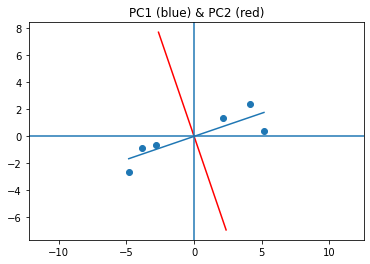

In [7]:
# Visualize PC1 & PC2
plt.scatter(x1, x2)
plt.plot(pc1_x, pc1_y)
plt.plot(pc2_x, pc2_y, color='red')
plt.axis('equal')
plt.axvline(0)
plt.axhline(0)
plt.title("PC1 (blue) & PC2 (red)")


In [8]:
# Projection of data points onto PC1
projections_pc1_x, projections_pc1_y = project_points_onto_line(x1, x2, np.array([pc1_slope, 0]))

Text(0.5, 1.0, 'Projection of data points onto PC1')

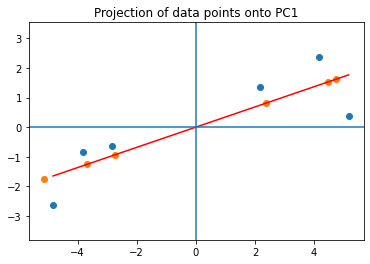

In [9]:
# Visualize projections of data points on PC1
plt.scatter(x1, x2)
plt.scatter(projections_pc1_x, projections_pc1_y)
plt.plot(pc1_x, pc1_y, color='red')
plt.axis('equal')
plt.axvline(0)
plt.axhline(0)
plt.title("Projection of data points onto PC1")

In [10]:
# Projection of data points onto PC2
projections_pc2_x, projections_pc2_y = project_points_onto_line(x1, x2, np.array([pc2_slope, 0]))

Text(0.5, 1.0, 'Projection of data points onto PC2')

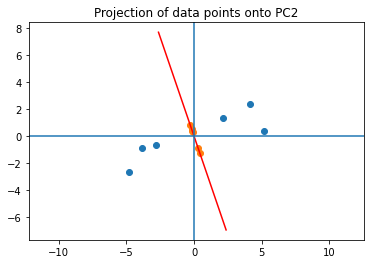

In [11]:
# Visualize of projection of data points onto PC2
plt.scatter(x1, x2)
plt.scatter(projections_pc2_x, projections_pc2_y)
plt.plot(pc2_x, pc2_y, color='red')
plt.axis('equal')
plt.axvline(0)
plt.axhline(0)
plt.title("Projection of data points onto PC2")

Text(0.5, 1.0, 'Original data & their projections on PC1 and PC2')

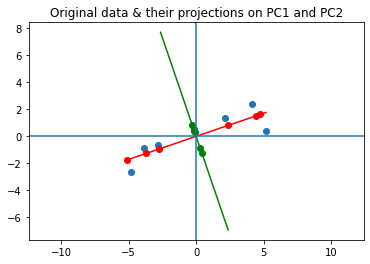

In [12]:
# Visualize original data & projections
plt.scatter(x1, x2)
plt.scatter(projections_pc1_x, projections_pc1_y, color='red')
plt.scatter(projections_pc2_x, projections_pc2_y, color='green')
plt.plot(pc1_x, pc1_y, color='red')
plt.plot(pc2_x, pc2_y, color='green')
plt.axis('equal')
plt.axvline(0)
plt.axhline(0)
plt.title("Original data & their projections on PC1 and PC2")

In [13]:
# Rotating all data points so PC1 & PC2 are identical onto X,Y axes
degrees = math.atan(pc1_slope) * -1
origin = [0,0]
[x1,x2] = rotate(origin, [x1,x2], degrees)
[pc1_x, pc1_y] = rotate(origin, [pc1_x, pc1_y], degrees)
[pc2_x, pc2_y] = rotate(origin, [pc2_x, pc2_y], degrees)
[projections_pc1_x, projections_pc1_y] = rotate(origin, [projections_pc1_x, projections_pc1_y], degrees)
[projections_pc2_x, projections_pc2_y] = rotate(origin, [projections_pc2_x, projections_pc2_y], degrees)

Text(0.5, 1.0, 'Projections of data after rotation')

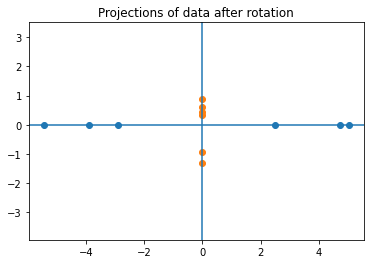

In [14]:
# Visualize projections of data after rotation
plt.scatter(projections_pc1_x, projections_pc1_y)
plt.scatter(projections_pc2_x, projections_pc2_y)
plt.axis('equal')
plt.axvline(0)
plt.axhline(0)
plt.title("Projections of data after rotation")

Text(0.5, 1.0, 'Corresponding Projections of PC1 & PC2')

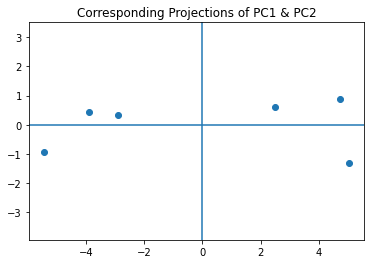

In [15]:
# Visualize the corresponding projections
plt.scatter(projections_pc1_x, projections_pc2_y)
plt.axis('equal')
plt.axvline(0)
plt.axhline(0)
plt.title("Corresponding Projections of PC1 & PC2")

In [16]:
# Calculate variations for PC1 and PC2 and the sum of them
pc1_variation  = variation(projections_pc1_x, mean=0)
pc2_variation = variation(projections_pc2_y, mean=0)
total_variation = pc1_variation + pc2_variation

# Calculate percentages of PC1 and PC2
pc1_percentage = pc1_variation / total_variation * 100
pc2_percentage = pc2_variation / total_variation * 100 # yeah I know it's 100 - pc1_percentage :)

PC1 Variation: 21.28023469133954	 PC1 Percentage: 96.31971043153078
PC2 Variation: 0.8130986419937987	 PC2 Percentage: 3.6802895684692145


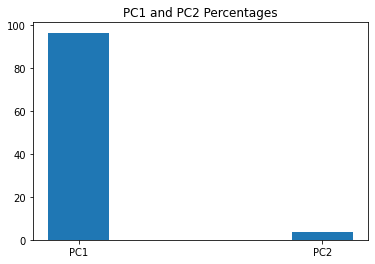

In [17]:
# Visualize Percentages
plt.bar(["PC1", "PC2"], [pc1_percentage, pc2_percentage], width=0.25)
plt.title("PC1 and PC2 Percentages")

print(f"PC1 Variation: {pc1_variation}\t PC1 Percentage: {pc1_percentage}")
print(f"PC2 Variation: {pc2_variation}\t PC2 Percentage: {pc2_percentage}")